<a href="https://colab.research.google.com/github/JacobTrevithick/Price-Prediction-Model/blob/main/Model_Testing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This Notebook is for testing purposes only. TESLA stock prediction model is taken from the following link

https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [183]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


df=pd.read_csv("/content/drive/MyDrive/Cryto_daily.csv")
print("Number of rows and columns:", df.shape)
df.head()

Number of rows and columns: (2949, 10)


,time,high,low,open,volumefrom,volumeto,close,conversionType,Datetime,Year
0,1388620800,886.21,810.47,815.94,12811.63,10826907.96,856.91,direct,2014-01-02,2014
1,1388707200,888.23,839.44,856.91,9709.01,8409629.11,884.26,direct,2014-01-03,2014
2,1388793600,932.16,848.32,884.26,14239.01,12784626.88,924.69,direct,2014-01-04,2014
3,1388880000,1029.86,911.36,924.69,21374.20,20789364.52,1014.74,direct,2014-01-05,2014
4,1388966400,1093.44,964.74,1014.74,23076.53,23622237.65,1012.65,direct,2014-01-06,2014


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
# split the data into training and test sets

training_set = df[df['Year'] < 2021].iloc[:, 6:7].values
test_set = df[df['Year'] >= 2021].iloc[:, 6:7].values


# training_set = df.iloc[:2200, 6:7].values
# test_set = df.iloc[2200:, 6:7].values

In [185]:
df[df['Year'] < 2021].iloc[:, 6:7]

,close
0,856.91
1,884.26
2,924.69
3,1014.74
4,1012.65
...,...
2551,26249.27
2552,27039.45
2553,27360.78
2554,28889.61


In [186]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []

for i in range(60, 2556):

    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [199]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# model.add(Dropout(0.1))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.1))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.1))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
78/78 [==============================] - 37s 65ms/step - loss: 0.0041
Epoch 2/100
78/78 [==============================] - 5s 65ms/step - loss: 0.0013
Epoch 3/100
78/78 [==============================] - 5s 65ms/step - loss: 9.9643e-04
Epoch 4/100
78/78 [==============================] - 5s 65ms/step - loss: 8.6359e-04
Epoch 5/100
78/78 [==============================] - 5s 66ms/step - loss: 6.7837e-04
Epoch 6/100
78/78 [==============================] - 5s 65ms/step - loss: 6.9681e-04
Epoch 7/100
78/78 [==============================] - 5s 65ms/step - loss: 6.9234e-04
Epoch 8/100
78/78 [==============================] - 5s 65ms/step - loss: 5.6803e-04
Epoch 9/100
78/78 [==============================] - 5s 65ms/step - loss: 4.7839e-04
Epoch 10/100
78/78 [==============================] - 5s 65ms/step - loss: 4.8761e-04
Epoch 11/100
78/78 [==============================] - 5s 65ms/step - loss: 4.1394e-04
Epoch 12/100
78/78 [==============================] - 5s 65ms/step - l

In [204]:
model.save('/content/drive/MyDrive/Crypto_Models/Trained_model_3_daily_BTC_4L_50N_0p0D_trainUpTo2021.h5')

In [207]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Crypto_Models/Trained_model_2_daily_BTC_4L_50N_0p1D_trainUpTo2021.h5')

In [208]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:2556, 1:2]
dataset_test = df.iloc[2556:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
dummy = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = dummy.reshape(-1,1)
inputs_transformed = sc.transform(inputs)

X_test = []

for i in range(60, 453):
    X_test.append(inputs_transformed[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(393, 60, 1)


In [201]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [209]:
predicted_stock_price = model_loaded.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

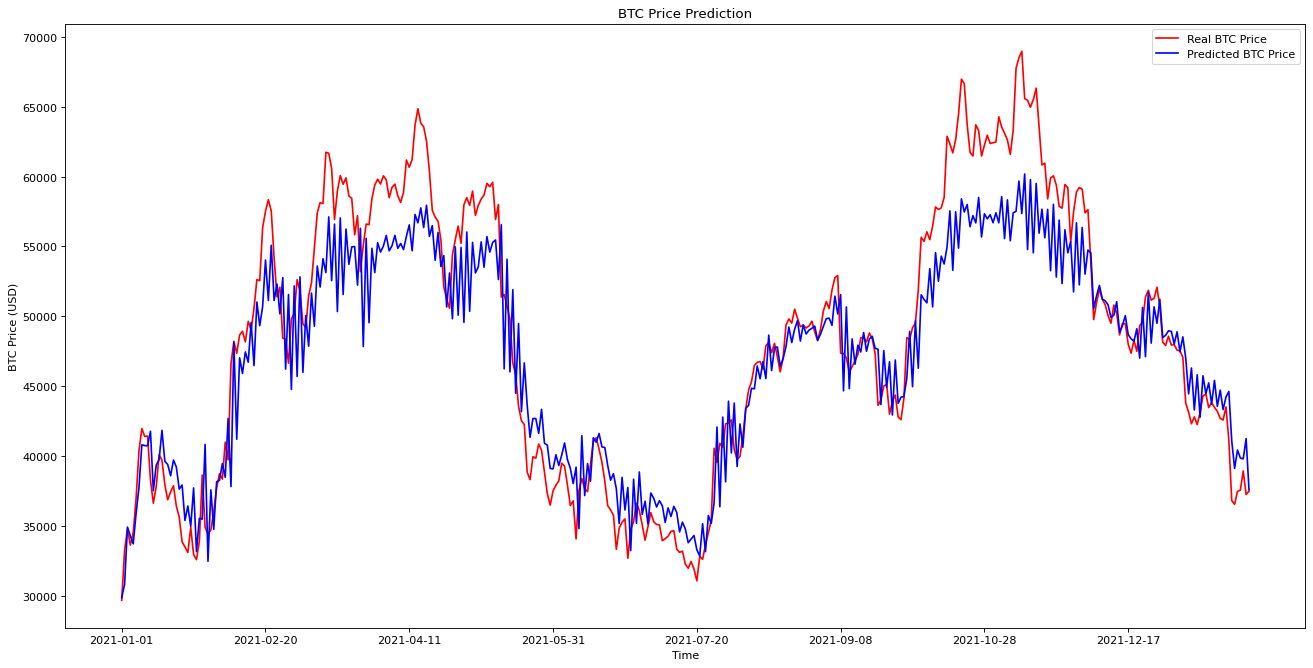

In [210]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

# Visualising the results
plt.plot(df.loc[2556:, 'Datetime'],dataset_test.values, color = 'red', label = 'Real BTC Price')
plt.plot(df.loc[2556:, 'Datetime'],predicted_stock_price[:,0], color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,363,50))
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.show()

In [211]:
# calculate root mean squared error
testScoreRMSE = np.sqrt(mean_squared_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1)))
print('Test Score: %.2f RMSE' % (testScoreRMSE))

testScoreMAE = mean_absolute_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1))
print('Test Score: %.2f MAE' % (testScoreMAE))

# dataset_test.values[:250]
# predicted_stock_price[:,0].reshape(-1,1)

Test Score: 3680.09 RMSE
Test Score: 2836.16 MAE


## Trial 2:

### Now I will attempt to use multiple features, instead of just closing price. Intiutivally, stock trading volume should have an impact on the prediction

In [20]:
df.head()


,time,high,low,open,volumefrom,volumeto,close,conversionType,Datetime,Year
0,1388620800,886.21,810.47,815.94,12811.63,10826907.96,856.91,direct,2014-01-02,2014
1,1388707200,888.23,839.44,856.91,9709.01,8409629.11,884.26,direct,2014-01-03,2014
2,1388793600,932.16,848.32,884.26,14239.01,12784626.88,924.69,direct,2014-01-04,2014
3,1388880000,1029.86,911.36,924.69,21374.20,20789364.52,1014.74,direct,2014-01-05,2014
4,1388966400,1093.44,964.74,1014.74,23076.53,23622237.65,1012.65,direct,2014-01-06,2014


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            2949 non-null   int64  
 1   high            2949 non-null   float64
 2   low             2949 non-null   float64
 3   open            2949 non-null   float64
 4   volumefrom      2949 non-null   float64
 5   volumeto        2949 non-null   float64
 6   close           2949 non-null   float64
 7   conversionType  2949 non-null   object 
 8   Datetime        2949 non-null   object 
 9   Year            2949 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 230.5+ KB


In [149]:
# split the data into training and test sets

training_set = df[df['Year'] < 2021].iloc[:, [1,2,3,5,6]].values
test_set = df[df['Year'] >= 2021].iloc[:, [1,2,3,5,6]].values

test_set

array([[2.96663300e+04, 2.87482100e+04, 2.89724000e+04, 1.48730622e+09,
        2.93889400e+04],
       [3.32572900e+04, 2.90362600e+04, 2.93889400e+04, 3.75044082e+09,
        3.22036400e+04],
       [3.47893400e+04, 3.20105900e+04, 3.22036400e+04, 3.13275931e+09,
        3.30634800e+04],
       ...,
       [3.89303600e+04, 3.62759200e+04, 3.69759900e+04, 2.16338436e+09,
        3.68293700e+04],
       [3.72427900e+04, 3.55439400e+04, 3.68293700e+04, 1.67111883e+09,
        3.71898500e+04],
       [3.74795700e+04, 3.66627500e+04, 3.71898500e+04, 2.87158107e+08,
        3.71681800e+04]])

In [150]:
df[df['Year'] < 2021].iloc[:, [1,2,3,5,6]]

,high,low,open,volumeto,close
0,886.21,810.47,815.94,1.082691e+07,856.91
1,888.23,839.44,856.91,8.409629e+06,884.26
2,932.16,848.32,884.26,1.278463e+07,924.69
3,1029.86,911.36,924.69,2.078936e+07,1014.74
4,1093.44,964.74,1014.74,2.362224e+07,1012.65
...,...,...,...,...,...
2551,28340.08,25805.96,26445.70,2.463391e+09,26249.27
2552,27461.63,26085.96,26249.27,1.402006e+09,27039.45
2553,27383.60,25864.25,27039.45,1.479551e+09,27360.78
2554,28990.20,27360.09,27360.78,1.993722e+09,28889.61


In [151]:
# Creating the Training Data

# MinMaxScaler is used to normalize the data

scaler = MinMaxScaler(feature_range = (0,1))

training_data = scaler.fit_transform(training_set)
training_data

X_train = [] 
Y_train = []

training_data.shape[0]

for i in range(60, training_data.shape[0]):

  X_train.append(training_data[i-60:i])
  Y_train.append(training_data[i,4])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

# scaler = MinMaxScaler(feature_range = (0, 1))

# training_set_scaled = scaler.fit_transform(training_set)

# X_train = []
# y_train = []

# for i in range(60, training_set.shape[0]):
    
#     X_train.append(training_set_scaled[i-60:i])
#     y_train.append(training_set_scaled[i,1])
    
# X_train, y_train = np.array(X_train), np.array(y_train)

# X_train.shape
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))


(2496, 60, 5)

In [121]:
training_data.shape[0]

2190

In [165]:
# activation = 

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# # # # Adding a third LSTM layer and some Dropout regularisation
# # model.add(LSTM(units = 80, return_sequences = True))
# # model.add(Dropout(0.4))

# # # # Adding a fourth LSTM layer and some Dropout regularisation


# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120))
model.add(Dropout(0.5))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 20, batch_size = 50, validation_split=0.1)

Epoch 1/20
45/45 [==============================] - 17s 133ms/step - loss: 0.0043 - val_loss: 0.0130
Epoch 2/20
45/45 [==============================] - 4s 86ms/step - loss: 0.0018 - val_loss: 0.0140
Epoch 3/20
45/45 [==============================] - 4s 85ms/step - loss: 0.0018 - val_loss: 0.0168
Epoch 4/20
45/45 [==============================] - 4s 86ms/step - loss: 0.0015 - val_loss: 0.0158
Epoch 5/20
45/45 [==============================] - 4s 86ms/step - loss: 0.0013 - val_loss: 0.0078
Epoch 6/20
45/45 [==============================] - 4s 87ms/step - loss: 0.0012 - val_loss: 0.0144
Epoch 7/20
45/45 [==============================] - 4s 86ms/step - loss: 0.0012 - val_loss: 0.0085
Epoch 8/20
45/45 [==============================] - 4s 85ms/step - loss: 0.0010 - val_loss: 0.0080
Epoch 9/20
45/45 [==============================] - 4s 86ms/step - loss: 0.0010 - val_loss: 0.0075
Epoch 10/20
45/45 [==============================] - 4s 86ms/step - loss: 9.8286e-04 - val_loss: 0.0107
Epo

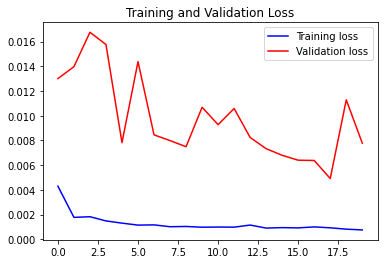

In [166]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [167]:
part_60_days = df[df['Year'] < 2021].iloc[:, [1,2,3,5,6]].tail(60)
test_df= part_60_days.append(df[df['Year'] >= 2021].iloc[:, [1,2,3,5,6]], ignore_index = True)
# test_df = test_df.drop(['Date', 'Adj Close'], axis = 1)
test_df.head()

# df[df['Year'] < 2020].iloc[:, [4, 6]]

,high,low,open,volumeto,close
0,13828.48,13221.65,13761.72,4.530963e+08,13571.24
1,14071.54,13300.84,13571.24,3.002714e+08,14023.78
2,14258.90,13539.13,14023.78,4.231182e+08,14157.73
3,15739.47,14114.37,14157.73,6.252887e+08,15599.92
4,15948.88,15219.57,15599.92,5.380144e+08,15590.62


In [168]:
# Creating test set

inputs = scaler.transform(test_df)

X_test = []
Y_test = []

for i in range (60, inputs.shape[0]):

    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 4])

X_test, Y_test = np.array(X_test), np.array(Y_test) 
X_test.shape, Y_test.shape
Y_pred = model.predict(X_test) 
Y_pred, Y_test


# dataset_train = df.iloc[:2190, [4,6]]
# dataset_test = df.iloc[2190:, [4,6]]

# # dataset_total = df.iloc[:, [4,6]]
# dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
# dummy = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

# inputs = dummy.reshape(-1,2)
# inputs_transformed = scaler.transform(inputs)

# X_test = []

# for i in range(60, len(dataset_total) - len(training_set) + 60):
#     X_test.append(inputs_transformed[i-60:i, 0:2])
    
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))
# print(X_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(array([[0.6363979 ],
        [0.6572237 ],
        [0.68206143],
        [0.7114729 ],
        [0.7429882 ],
        [0.77306503],
        [0.80113983],
        [0.8301692 ],
        [0.8618197 ],
        [0.8911274 ],
        [0.9079857 ],
        [0.90407467],
        [0.87837625],
        [0.83770716],
        [0.7931913 ],
        [0.7529133 ],
        [0.72081536],
        [0.6973071 ],
        [0.6818015 ],
        [0.67345124],
        [0.6704937 ],
        [0.6695552 ],
        [0.6688343 ],
        [0.668804  ],
        [0.6705425 ],
        [0.6755534 ],
        [0.68388265],
        [0.69374865],
        [0.7046358 ],
        [0.7204968 ],
        [0.7427566 ],
        [0.7673915 ],
        [0.78745025],
        [0.7982329 ],
        [0.799895  ],
        [0.7948509 ],
        [0.78563625],
        [0.77583396],
        [0.76694214],
        [0.7659467 ],
        [0.7815768 ],
        [0.81407154],
        [0.8559445 ],
        [0.8947803 ],
        [0.91773784],
        [0

In [169]:
scaler.scale_

scale = 1/(scaler.scale_[1])
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
Y_pred

array([[17733.527],
       [18313.848],
       [19005.963],
       [19825.527],
       [20703.717],
       [21541.82 ],
       [22324.139],
       [23133.055],
       [24015.012],
       [24831.686],
       [25301.45 ],
       [25192.467],
       [24476.367],
       [23343.104],
       [22102.648],
       [20980.283],
       [20085.86 ],
       [19430.791],
       [18998.719],
       [18766.035],
       [18683.623],
       [18657.47 ],
       [18637.383],
       [18636.537],
       [18684.982],
       [18824.613],
       [19056.713],
       [19331.633],
       [19635.008],
       [20076.982],
       [20697.262],
       [21383.725],
       [21942.672],
       [22243.137],
       [22289.451],
       [22148.895],
       [21892.123],
       [21618.979],
       [21371.203],
       [21343.465],
       [21779.006],
       [22684.486],
       [23851.297],
       [24933.473],
       [25573.197],
       [25615.719],
       [25087.754],
       [24183.236],
       [23196.988],
       [22377.262],


In [170]:
Y_test

array([28267.64411807, 30985.26905238, 31815.45437355, 30818.14868435,
       32756.64454025, 35471.24742388, 38010.10792269, 39127.04047421,
       38741.24142946, 36776.83124761, 34164.10912679, 32776.06097448,
       35983.92432155, 37697.44636641, 35413.61604848, 34675.0867244 ,
       34495.74298206, 35252.2501284 , 34585.80588535, 34169.27461278,
       29668.94874189, 31761.90711137, 30892.2420291 , 31062.52927451,
       31054.42863388, 31287.35825884, 29266.08911072, 32182.72525456,
       32963.06122221, 33026.53394157, 31892.4442525 , 32271.61988905,
       34191.52965052, 36270.18879619, 35600.20112631, 36881.26096051,
       37805.03330158, 37420.57631767, 44728.1362358 , 44797.80753834,
       43200.25306759, 46242.80155295, 45691.84212832, 45485.97578786,
       46867.18811946, 46175.53437379, 47380.60846091, 50248.44765864,
       49704.57508768, 53896.69040983, 53865.18577289, 55380.17936392,
       52146.89410172, 47104.53978664, 47915.05764062, 45351.33522329,
      

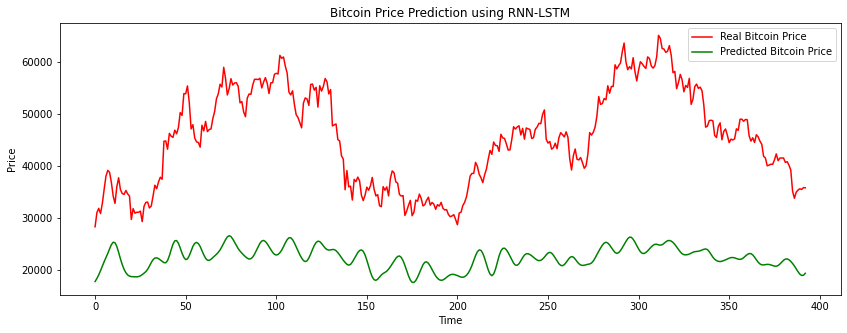

In [171]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred[:,0], color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
predicted_stock_price = model.predict(X_test)

# Get something which has as many features as dataset
predicted_stock_price_extended = np.zeros((len(predicted_stock_price),2))

# Put the predictions there
predicted_stock_price_extended[:,0] = predicted_stock_price[:,0][:,0]

# Inverse transform it and select the 1st column.
predicted_stock_price = scaler.inverse_transform(predicted_stock_price_extended)[:,0]
predicted_stock_price

array([81159.03651875, 81158.63566059, 81159.4296681 , 81159.02880994,
       81159.15215091, 81158.52773724, 81156.36927024, 81156.83179888,
       81157.81081784, 81156.29218213, 81156.72387553, 81156.59282575,
       81155.96070327, 81155.08189885, 81155.39025128, 81155.42108652,
       81153.81765389, 81153.60180719, 81153.47075741, 81151.15040539,
       81149.22320271, 81149.97095735, 81148.02062823, 81148.59108023,
       81149.10757055, 81150.52599172, 81150.39494194, 81151.84419835,
       81151.03477322, 81150.2947274 , 81149.88616043, 81149.90157805,
       81149.18465865, 81150.24076572, 81150.94997631, 81150.85747058,
       81150.95768512, 81149.94783091, 81149.50071989, 81149.42363178,
       81149.30799962, 81149.66260492, 81148.85317979, 81149.08444411,
       81147.83561678, 81146.60220706, 81149.40821416, 81149.06902649,
       81149.35425249, 81149.23862033, 81150.76496485, 81149.76281946,
       81149.59322562, 81149.42363178, 81149.37737892, 81149.577808  ,
      

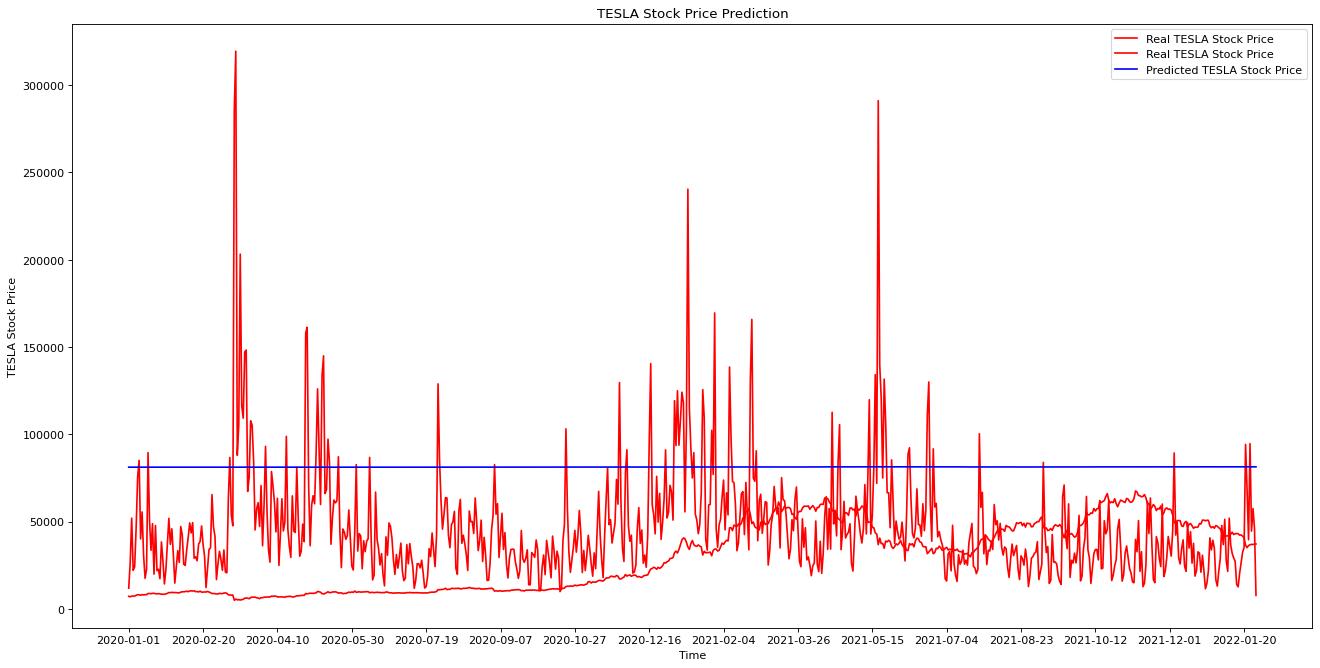

In [67]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

# len(df[df['Year']>2020]['Datetime'])

# len(dataset_test.values)

# Visualising the results
plt.plot(df.loc[2190:, 'Datetime'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[2190:, 'Datetime'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,759,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [ ]:
# calculate root mean squared error
testScoreRMSE = np.sqrt(mean_squared_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1)))
print('Test Score: %.2f RMSE' % (testScoreRMSE))

testScoreMAE = mean_absolute_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1))
print('Test Score: %.2f MSE' % (testScoreMAE))


IndexError: too many indices for array

In [ ]:
model.save('Saved_model_2/Trained_model_2.h5')